In [1]:
import numpy as np
import pandas as pd
import pygmt
import obspy
from pyrocko import moment_tensor as pmt
import matplotlib.pyplot as plt
from obspy.imaging.beachball import beachball

In [2]:
#Open the output file
#fo=open("focmec_output2.txt",'w')
#event="%d-%02d-%02dT%02d:%02d:%4.2f"%(df_eve[0][nm],df_eve[1][nm],df_eve[2][nm],df_eve[3][nm],df_eve[4][nm],df_eve[5][nm])
#print("id","Event", "Latitude","Longitude","Depth","Magnitude","Strike","Dip","Rake",\
 #     "Strike_SD","Dip_SD","Rake_SD","Strike2","Dip2","Rake2","Location",file=fo)
#fo.close()


     0   1   2   3   4      5          6          7       8      9     10  \
0  2008  12   4  14   3  28.11 -26.484288 -67.541467  10.858  0.041  2.82   

     11  
0  0.48  
20081204143


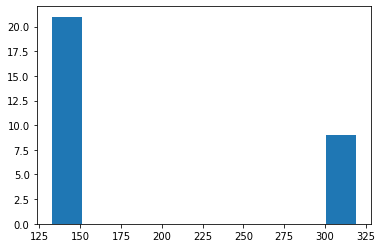

In [4]:
df_eve=pd.read_csv("../input_prep/inputs/target_event.txt",header=None,sep='\s+') #Event file
print(df_eve)
nm=0 #Event number

eveid="%d%02d%02d%02d%d"%(df_eve[0][nm],df_eve[1][nm],df_eve[2][nm],df_eve[3][nm],df_eve[4][nm])
print(eveid)

df=pd.read_csv("../focmec_runs/%s/output_%s_uw.out"%(eveid,eveid),header=None,sep='\s+',skiprows=11)
plt.hist(df[1])
plt.show()

In [6]:
magnitude = 2.0 # Magnitude of the earthquake
m0 = pmt.magnitude_to_moment(magnitude)  # convert the mag to moment
M=[0.0]*6
for i in range(len(df[0])):
    if df[1][i]>0 and df[1][i]<360:
        strike=df[1][i]
        dip=df[0][i]
        rake=df[2][i]
        mt = pmt.MomentTensor(strike=strike, dip=dip, rake=rake, scalar_moment=m0)
        m6 = [mt.mnn, mt.mee, mt.mdd, mt.mne, mt.mnd, mt.med]  # The six MT components
        M+=m6/mt.scalar_moment()
avgm = (M/len(df[0]))
#print(avgm)
# init pyrocko moment tensor
m1 = pmt.MomentTensor(
    mnn=avgm[0]*m0,
    mee=avgm[1]*m0,
    mdd=avgm[2]*m0,
    mne=avgm[3]*m0,
    mnd=avgm[4]*m0,
    med=avgm[5]*m0)
#print(m1)  # print moment tensor
# gives out both nodal planes:
(s1, d1, r1), (s2, d2, r2) = m1.both_strike_dip_rake()
print(s1,d1,r1)
print(s2,d2,r2)

var_str1=[]
var_dip1=[]
var_rake1=[]
var_str2=[]
var_dip2=[]
var_rake2=[]

for i in range(len(df[1])):    
    if df[1][i]>0 and df[1][i]<200:
        var_str1.append((df[1][i]-s1)**2)
        var_dip1.append((df[0][i]-d1)**2)
        var_rake1.append((df[2][i]-r1)**2)
    #elif df[1][i]<50:
     #   var_str1.append((360-df[1][i]-s2)**2)
      #  var_dip1.append((df[0][i]-d2)**2)
       # var_rake1.append((df[2][i]-r2)**2)
    else:
        #continue
        var_str1.append((df[1][i]-180-s1)**2)
        var_dip1.append((df[0][i]-d1)**2)
        var_rake1.append((df[2][i]+r1)**2)

sd = [np.sqrt(np.mean(var_str1)),np.sqrt(np.mean(var_dip1)),np.sqrt(np.mean(var_rake1))]

#Standard deviation for strike,dip and rake
print(sd)
(df_eve[0][nm],df_eve[1][nm],df_eve[2][nm],df_eve[3][nm],df_eve[4][nm])

136.816356825 84.903280052 18.7416763803
45.0898816584 71.3351690039 174.619534959
[2.2630698349252576, 7.833905716627183, 6.2764261103177379]


(2008, 12, 4, 14, 3)

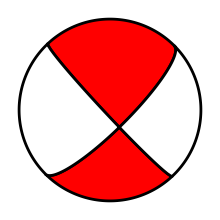

0


In [7]:
#Plot average beachball
mt = [s1,d1,r1]
beachball(mt, size=200, linewidth=2, facecolor='r');
print(nm)

In [8]:
#Print output line and copy it to the final output file
event="%d-%02d-%02dT%02d:%02d:%4.2f"%(df_eve[0][nm],df_eve[1][nm],df_eve[2][nm],df_eve[3][nm],df_eve[4][nm],df_eve[5][nm])
print(1,event,df_eve[6][nm],df_eve[7][nm],df_eve[8][nm],df_eve[10][nm],int(s1),int(d1),int(r1),int(sd[0]),int(sd[1]),int(sd[2]),int(s2),int(d2),int(r2),1)

print(1,event,df_eve[6][nm],df_eve[7][nm],df_eve[8][nm],df_eve[10][nm],int(s2),int(d2),int(r2),int(sd[0]),int(sd[1]),int(sd[2]),int(s1),int(d1),int(r1),1)    

1 2008-12-04T14:03:28.11 -26.484288 -67.541467 10.858 2.82 136 84 18 2 7 6 45 71 174 1
1 2008-12-04T14:03:28.11 -26.484288 -67.541467 10.858 2.82 45 71 174 2 7 6 136 84 18 1


Text(0.5, 0, 'Rake Error')

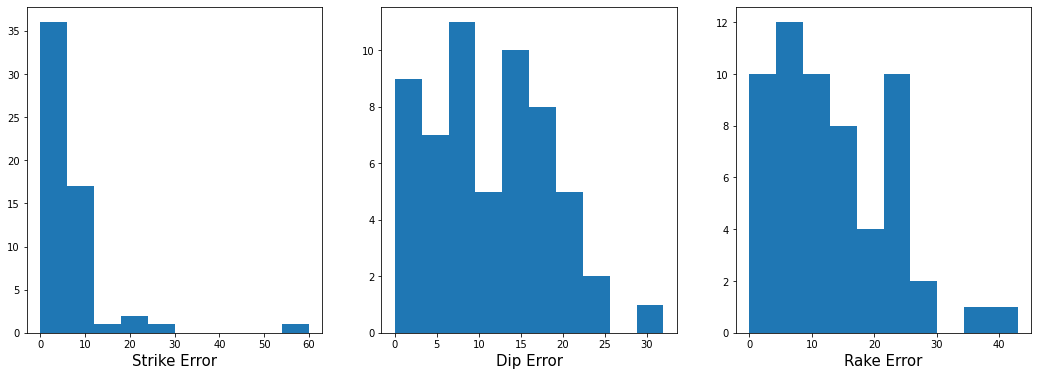

In [9]:
#Check average error
df=pd.read_csv("../output/focmec_output.txt",sep='\s+')
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.hist(df['Strike_SD'])
plt.xlabel('Strike Error',fontsize=15)
plt.subplot(132)
plt.hist(df['Dip_SD'])
plt.xlabel('Dip Error', fontsize=15)
plt.subplot(133)
plt.hist(df['Rake_SD'])
plt.xlabel('Rake Error', fontsize=15)

In [10]:
sm = np.mean(df['Strike_SD'])
dm = np.mean(df['Dip_SD'])
rm = np.mean(df['Rake_SD'])
print(sm,dm,rm)

6.0344827586206895 11.344827586206897 13.206896551724139


In [11]:
print(np.mean([sm,dm,rm]))

10.1954022989
